In [394]:
# OPTIONAL: Load the "autoreload" extension so that code can change
%load_ext autoreload

# OPTIONAL: always reload modules so that as you change code in src, it gets loaded
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [395]:
import pandas as pd
import matplotlib.pyplot as plt
import warnings
import numpy as np
warnings.filterwarnings('ignore')
pd.options.display.max_columns = 100

# Analisis exploratorio puntos de venta (pos.csv)
En esta sección vamos a estar realizando el preprocesamiento de los datos de pos, quitando errores y reemplazando valores faltantes. 
El archivo pos.csv contiene la información de todos los puntos de venta.

Tenemos muchas columnas que podemos utilizar para realizar algún tipo de clasificación. Tengamos en cuenta que en el apartado anterior, nos dimos cuenta que muchos puntos de venta solo tienen 1 venta. 
Podríamos intentar encontrar puntos de ventas semejantes, con algún algoritmo de clustering, y agregar estas predicciones como características a nuestro modelo, o simplemente realizar un análisis descriptivo de los puntos de venta que tienen más ventas para reconocer un patrón en los datos.

Procedemos a la limpieza de los datos de este dataset.

In [396]:
df_pos = pd.read_csv('../data/raw/pos.csv')
df_pos.describe(include='all')

,id_pos,competidores,ingreso_mediana,ingreso_promedio,densidad_poblacional,pct_0a5,pct_5a9,pct_10a14,pct_15a19,pct_20a24,pct_25a29,pct_30a34,pct_35a39,pct_40a44,pct_45a49,pct_50a54,pct_55a59,pct_60a64,pct_65a69,pct_70a74,pct_75a79,pct_80a84,pct_85ainf,pct_bachelors,pct_doctorados,pct_secundario,pct_master,pct_bicicleta,pct_omnibus,pct_subtes,pct_taxi,pct_caminata,mediana_valor_hogar
count,13265,13228.000000,13255.000000,13255.000000,13254.000000,13256.000000,13254.000000,13254.000000,13256.000000,13254.000000,13254.000000,13254.000000,13254.000000,13254.000000,13254.000000,13254.000000,13254.000000,13254.000000,13254.000000,13254.000000,13254.000000,13254.000000,13254.000000,13254.000000,13254.000000,13254.000000,13254.000000,13254.000000,13254.000000,13254.000000,13254.000000,13254.000000,1.325600e+04
unique,12934,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,Not Available,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,187,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,NaN,26.942093,55246.302913,72583.559634,11560.079662,6.028763,6.111135,6.054291,6.442756,7.753941,7.173834,6.839581,5.939916,6.284095,6.325390,6.930998,6.692093,5.800067,4.865878,3.628287,2.682968,2.092322,2.353145,18.043834,1.311318,28.586624,7.697663,0.616105,2.240169,1.426847,0.139632,3.622325,2.180152e+05
std,NaN,48.640683,14956.105565,19058.394087,16075.949863,1.241332,1.185604,1.183307,1.844200,3.821274,2.015550,1.450926,0.925992,0.861561,0.909160,1.020568,1.088922,1.185471,1.282186,1.152980,0.913151,0.787987,1.158338,6.029791,1.019936,6.789028,3.445855,0.828500,2.695583,5.133737,0.334497,3.925638,1.222221e+05
min,NaN,0.000000,15519.520000,22629.590000,0.050000,0.000000,0.000000,0.000000,0.120000,0.270000,0.320000,0.350000,0.340000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.950000,0.000000,3.590000,0.240000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000e+00
25%,NaN,4.000000,45749.675000,60149.599335,4569.852273,5.410000,5.520000,5.480000,5.653333,6.020000,6.042875,6.070000,5.480000,5.880000,5.901123,6.473534,6.173333,5.226000,4.217500,3.050000,2.200000,1.651667,1.690000,14.166354,0.682589,24.670000,5.410000,0.160000,0.630278,0.000000,0.000000,1.616875,1.439204e+05
50%,NaN,14.000000,53975.180000,70706.733330,8497.115000,5.991682,6.099167,6.064583,6.209444,7.014000,7.012111,6.780000,5.942500,6.312000,6.326491,6.931042,6.667750,5.714000,4.733229,3.503763,2.593643,2.025000,2.220000,18.135500,1.134688,28.036125,7.470357,0.413333,1.572662,0.072500,0.045420,2.567321,1.964381e+05
75%,NaN,32.000000,62144.407835,81347.835665,12858.229583,6.595875,6.696667,6.692000,6.852050,8.320706,7.991250,7.490000,6.394821,6.730000,6.764000,7.432500,7.218095,6.281667,5.343214,4.030000,3.024000,2.408000,2.776667,21.399330,1.675929,32.200000,9.381187,0.768000,2.860000,0.539605,0.140000,4.160000,2.576443e+05


### Analisis de id_pos
Sabemos de antemano, que id_pos tiene que ser de tipo númerico. Verificamos si tienen valores faltantes o valores erroneos.

In [397]:
# valores únicos antes de las pruebas
len(df_pos.id_pos.unique())

12935

In [398]:
# verificamos si tiene valores null
df_pos.id_pos.isna().any()

True

Intentamos transformar toda la columna a valores númericos, los valores no parseables los mantiene como nan.

In [399]:
df_pos.id_pos = pd.to_numeric(df_pos.id_pos, errors="coerce")

Removemos todos los items que poseen id_pos vacíos o tienen valores negativos. No los imputamos porque no tiene sentido inventar valores de id_pos. Tenemos 12897 puntos de venta distintos.

In [400]:
index_to_drop = df_pos[(df_pos.id_pos.isna()) | (df_pos.id_pos<0)].index
df_pos = df_pos.drop(index=index_to_drop)

In [401]:
# valores únicos antes de las pruebas
len(df_pos.id_pos.unique())

12897

La competición daba como posible respuesta el archivo "ejemploRespuesta.csv", en él se deberían encontrar todas las posibles respuestas de POS correctas, con los que los jurados harían las pruebas pertinentes. 
El enunciado dice: 

>Como en todas las competencias, cada solución propuesta es evaluada en contraposición a las respuestas correctas. El conjunto de respuestas se divide en dos, de manera secreta y al azar. Durante la competencia se mostrará el puntaje correspondiente a una mitad de puntos de venta posibles. Al finalizar la competencia, el puntaje válido será el correspondiente a la otra mitad de puntos de venta. ¡A no sobreajustar!

Por esta parte, asumimos que id de POS correctos son los que se encuentran en el archivo de ejemploRespuestas.csv.

>Los id_pos (primer columna) deben coincidir con los id_pos del archivo Ejemplo de Respuesta, en caso contrario la plataforma devolverá un error


Mencionado el apartado anterior, procedemos a verificar si las muestras de puntos de venta actuales corresponden a las del archivo de salida de ejemplo, provisto por la competencia. 

La forma de realizar esto es con un outer join entre ambos archivos, por identificador, y quedandonos solamente con los que se encuentran individualmente en cada dataset. 

In [402]:
## buscamos los id_pos del archivo ejemploRespuesta.csv
df_ej_resp = pd.read_csv('../data/raw/ejemploRespuesta.csv', names=["id_pos", "unidades"])

In [403]:
(
    df_ej_resp
    .merge(df_pos, on=["id_pos"], indicator=True, how='outer')
    [lambda df: df._merge != 'both']
).count(1)

Series([], dtype: int64)

Podemos observar que no existen muestras que se encuentren solo en el archivo de respuesta o en el archivo de puntos de venta. 
En simples palabras, todos los puntos de venta del archivo pos.csv deben encontrarse como resultado de la predicción.
____

##### Anexo: Explicación del outer join
Observando el siguiente diagrama, lo que intentamos buscar al realizar el outer-join son los elementos que se encuentran en el sector blanco (A y B), los cuales no se cruzan: 

![alt text](./img/sql-join-example.png)

Filtrando los inner-join (el sector rojo) la consulta nos devolvería datos, los cuales corresponderían al sector blanco. Esto se realiza filtrando con la columna "_merge" que nos retornar el operador "merge" de la librería de dataframes. El operador *merge* nos retorna 3 posibles valores: left_only, right_only y both. Al filtrar los valores de que poseen "both", nos quedarían los restantes que se encuentran en sector blanco del diagrama anterior.

___
### Explorando los datos
Primero vamos a guardar un archivo intermedio que posee los puntos de venta que no tienen ventas:

In [404]:
# buscamos todas las ventas
df_ventas = pd.read_parquet('../data/interim/01-ventas.parquet')

In [405]:
pos_sin_ventas = (
    df_pos.merge(df_ventas, on='id_pos', indicator=True, how="left")
    [lambda df: df._merge != 'both'].id_pos.unique()
)

"algunos POS sin ventas: {}".format(list(pos_sin_ventas[0:10]))

'algunos POS sin ventas: [288.0, 953.0, 1004.0, 1488.0, 3171.0, 3300.0, 3375.0, 3389.0, 3603.0, 3780.0]'

In [406]:
pos_sin_ventas.size

1044

Guardamos los puntos de venta que no poseen ventas

In [407]:
pos_sin_ventas = pd.DataFrame({'id_pos': pos_sin_ventas})
pos_sin_ventas.to_parquet('../data/interim/02-pos_sin_ventas.parquet')

Concluimos que tenemos 1044 puntos de venta en nuestro dataset que no poseen ventas asociadas, pero deben encontrarse en la predicción. 

____
## Valores faltantes/nulos
Buscamos puntos de ventas que tienen todos los datos faltantes, existen 46 rows con id_pos correcto, pero que todos sus datos están vacíos. 

In [408]:
# buscamos las filas que tienen todas las columnas como valores faltantes
ix_all_nan = (
    df_pos
    .set_index('id_pos')
    .isna()
    .all(axis=1)
)

In [409]:
#nos quedamos solamente con las que tienen todas las columnas en null. 
ix_all_nan = ix_all_nan[lambda df: df==True]

ix_all_nan.shape, df_pos.shape

((46,), (12897, 33))

In [410]:
ix_all_nan = pd.DataFrame(ix_all_nan.index)
ix_all_nan.head()

,id_pos
0,288.0
1,27400.0
2,31250.0
3,37897.0
4,38933.0


En el dataframe ix_all_nan se encuentra todos los valores de id_pos que tienen todas las demás columnas con valores faltantes.

¿Podríamos descartar las 46 muestras?, si fuera por importancia, frente a un total de 12897 no restaría demasiado datos. Tenemos otras situaciones en las que esas 46 muestras deberían quedarse: al encontrarse en el archivo de salida de ejemplo y algunas de ellas poseen ventas asociadas.

En este caso, donde tenemos todas las filas como obligatorias en df_pos, nos vemos con la obligación de realizar algún tratamiendo para los datos faltantes en dichas columnas.

Los puntos de venta que tienen todas las columnas vacías (46) son un subconjunto de los elementos que no tienen ventas.

In [411]:
( 
    ix_all_nan
    .merge(pos_sin_ventas, indicator=True, how="outer")
    ._merge
    .value_counts()
)

right_only    998
both           46
left_only       0
Name: _merge, dtype: int64

Relacionando los valores vacíos y la cantidad de ventas, podríamos imputar los valores de las columnas faltantes con las medias de las columnas, en particular podemos agrupar los POS según tipo de ventas: "pocas", "medias", "muchas", "sin ventas" y realizar la imputación.

Verificamos la cantidad de ventas que tenemos por id_pos y graficamos un histograma. 

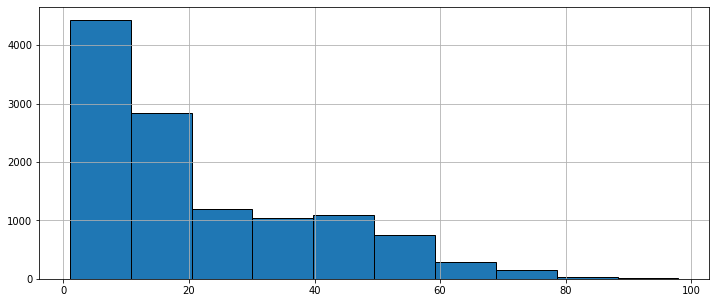

In [412]:
df_ventas_por_pos = df_ventas.groupby('id_pos')[["cantidad_ventas"]].sum() 
df_ventas_por_pos.columns = ["ventas"]
df_ventas_por_pos.ventas.hist(bins=10, edgecolor="k", figsize=(12,5))
plt.savefig("../reports/figures/02-hist-cantidad_ventas")

Se pueden ver que a a partir de 20 ventas, no es número tan frecuente, podriamos dividir el dataframe en 3 sectores con frecuencia similar, en otras palabras discretizamos por frecuencia:

(0.999, 9.0]    3996
(9.0, 25.0]     3943
(25.0, 98.0]    3914
Name: ventas, dtype: int64


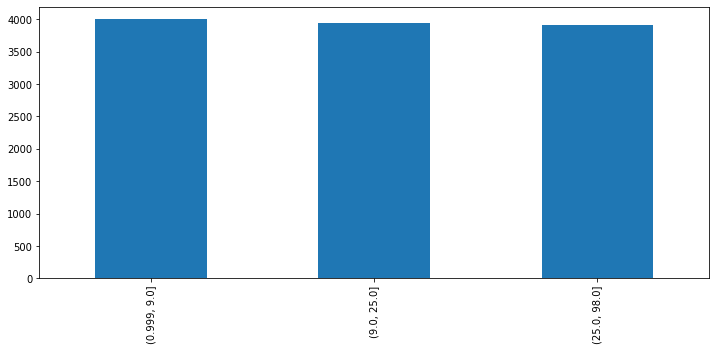

In [413]:
df_ventas_pos_freq = pd.qcut(df_ventas_por_pos.ventas, 3).value_counts()
print(df_ventas_pos_freq)
df_ventas_pos_freq.plot.bar(figsize=(12,5))

Renombramos el indice

In [414]:
df_ventas_pos_freq.index = df_ventas_pos_freq.index.rename_categories(["POCAS", "MEDIO", "MUCHAS"])
df_ventas_pos_freq.index = df_ventas_pos_freq.index.add_categories(['SIN VENTAS'])
df_ventas_pos_freq

POCAS     3996
MEDIO     3943
MUCHAS    3914
Name: ventas, dtype: int64

asignamos a cada categoria, el intervalo al que corresponden: 

In [415]:
df_ventas_pos_freq.index = df_ventas_pos_freq.index.reorder_categories(['SIN VENTAS','POCAS', 'MEDIO', 'MUCHAS'])
df_ventas_pos_freq.index

CategoricalIndex(['POCAS', 'MEDIO', 'MUCHAS'], categories=['SIN VENTAS', 'POCAS', 'MEDIO', 'MUCHAS'], ordered=True, dtype='category')

In [416]:
df_ventas_pos_freq = (
    pd.DataFrame({ 
        "ventas":df_ventas_pos_freq.values, 
        "ini":[1,10,25], 
        "fin":[9,25,98]
    }, index=df_ventas_pos_freq.index)
)

Agregamos el valor 0 para indicar sin ventas

In [417]:
df_ventas_pos_freq = (
    df_ventas_pos_freq
    .append(
        pd.DataFrame(
            {"ini":0, "fin":0},
            index=["SIN VENTAS"]
        )
    )
)

In [418]:
df_ventas_pos_freq

,fin,ini,ventas
POCAS,9,1,3996.0
MEDIO,25,10,3943.0
MUCHAS,98,25,3914.0
SIN VENTAS,0,0,NaN


Debemos asignarle a cada POS, la cantidad de ventas que posee:

In [419]:
to_merge = df_ventas.groupby('id_pos').cantidad_ventas.sum()
to_merge.columns=['cant_ventas']
to_merge.name = "ventas"

In [420]:
df_pos = df_pos.merge(to_merge, on='id_pos', how='left')

# asignamos 0 a las ventas de los POS sin relación con df_ventas
df_pos.ventas.fillna(0, inplace=True)
df_pos.tail()

,id_pos,competidores,ingreso_mediana,ingreso_promedio,densidad_poblacional,pct_0a5,pct_5a9,pct_10a14,pct_15a19,pct_20a24,pct_25a29,pct_30a34,pct_35a39,pct_40a44,pct_45a49,pct_50a54,pct_55a59,pct_60a64,pct_65a69,pct_70a74,pct_75a79,pct_80a84,pct_85ainf,pct_bachelors,pct_doctorados,pct_secundario,pct_master,pct_bicicleta,pct_omnibus,pct_subtes,pct_taxi,pct_caminata,mediana_valor_hogar,ventas
12892,124850.0,16.0,63923.2250,85457.13667,7727.8950,5.770,5.896667,5.886667,5.438333,5.751667,6.421667,6.573333,6.211667,6.818333,7.258333,7.758333,7.426667,6.571667,5.576667,3.831667,2.603333,2.110,2.091667,18.7200,2.101667,27.3300,9.998333,0.693333,1.003333,0.028333,0.121667,2.120,308094.700,0.0
12893,128111.0,2.0,39484.1900,51312.49000,110.7100,6.620,6.410000,9.450000,6.470000,4.090000,2.740000,5.730000,5.300000,5.410000,3.840000,5.690000,6.110000,7.170000,6.470000,3.830000,4.330000,3.940,6.410000,14.2100,0.210000,31.5400,5.020000,0.000000,0.480000,0.000000,0.000000,4.270,63697.990,0.0
12894,129492.0,11.0,70850.8225,89329.48250,4735.9825,5.145,6.282500,6.867500,6.470000,6.177500,5.350000,5.590000,6.025000,6.062500,7.117500,8.715000,8.507500,6.900000,5.350000,3.722500,2.340000,1.635,1.745000,21.3175,1.317500,26.6175,6.540000,1.142500,1.707500,0.302500,0.000000,3.530,494557.765,0.0
12895,129746.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0
12896,131072.0,18.0,68453.5160,91794.14400,5935.6400,5.178,5.974000,6.390000,5.828000,4.518000,4.514000,5.046000,5.444000,5.952000,6.074000,7.692000,8.204000,7.736000,6.508000,4.880000,3.542000,2.930,3.592000,23.8320,1.750000,23.8720,10.550000,0.140000,0.392000,0.058000,0.048000,1.378,231423.582,0.0


Debemos asignarle la etiqueta a todos los POS que tengan ventas para poder separarlos e imputarlos por grupos:

In [421]:
df_pos["tipo_pos_ventas"] = pd.Series([]).astype(df_ventas_pos_freq.index.dtype)
df_pos = df_pos.set_index('id_pos')

In [422]:
df_pos.sample(5)

,competidores,ingreso_mediana,ingreso_promedio,densidad_poblacional,pct_0a5,pct_5a9,pct_10a14,pct_15a19,pct_20a24,pct_25a29,pct_30a34,pct_35a39,pct_40a44,pct_45a49,pct_50a54,pct_55a59,pct_60a64,pct_65a69,pct_70a74,pct_75a79,pct_80a84,pct_85ainf,pct_bachelors,pct_doctorados,pct_secundario,pct_master,pct_bicicleta,pct_omnibus,pct_subtes,pct_taxi,pct_caminata,mediana_valor_hogar,ventas,tipo_pos_ventas
id_pos,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
6102.0,26.0,43322.065,61082.520,10106.15500,6.615,6.507500,6.097500,6.092500,7.582500,7.575000,6.970000,5.6875,6.160000,6.035000,6.795,6.8175,5.547500,4.250,3.1625,2.670,2.257500,3.177500,17.965000,2.0475,31.950000,7.1375,0.4275,1.5825,0.000,0.525000,4.515000,138317.79,37.0,NaN
16921.0,6.0,90178.180,108298.300,11411.32000,6.780,6.360000,7.020000,7.030000,6.440000,8.180000,8.360000,7.0300,7.190000,7.990000,7.940,6.5000,4.370000,3.480,2.2600,1.390,0.840000,0.840000,17.060000,0.4600,31.400000,7.4400,0.0000,0.0800,0.650,0.000000,0.320000,281547.53,8.0,NaN
13453.0,10.0,49308.780,71179.390,33515.12000,2.290,1.960000,1.410000,3.990000,34.070000,19.360000,10.570000,6.5200,3.840000,2.460000,2.670,2.8800,2.480000,1.760,1.0600,0.940,0.780000,0.960000,30.150000,4.8500,11.420000,14.7000,2.6600,1.7300,0.000,0.100000,11.980000,359592.34,13.0,NaN
14032.0,30.0,43368.060,60420.045,11215.95333,6.590,6.758333,6.646667,6.516667,7.401667,6.676667,6.498333,5.9650,6.351667,6.411667,6.800,6.5400,5.673333,4.795,3.5450,2.705,1.941667,2.178333,12.048333,0.8100,28.026667,5.3050,0.9100,1.3900,0.015,0.018333,1.078333,192176.35,14.0,NaN
3518.0,1.0,51725.160,63810.240,409.05000,5.770,7.340000,7.130000,6.950000,5.320000,6.070000,5.990000,5.7500,7.000000,7.720000,7.940,6.2600,6.140000,5.090,3.5900,2.400,2.040000,1.510000,9.470000,0.3500,34.400000,4.7100,0.0000,0.0000,0.000,0.000000,0.780000,126189.90,26.0,NaN


Ahora ya podemos imputar por grupo: 

In [423]:
# está funcion se encaga de imputar los valores del dataframe 
# que recibe (todas las columnas por igual)
from src.features.build_features import impute_values, assign_tipo_pos

In [424]:
assign_tipo_pos(df_pos, df_ventas_pos_freq)

In [425]:
df_pos = (
    df_pos.reset_index('id_pos')
    .groupby('tipo_pos_ventas')
    .apply(impute_values)
    .reset_index(level="tipo_pos_ventas")
)
df_pos.sample(5)

,tipo_pos_ventas,id_pos,competidores,ingreso_mediana,ingreso_promedio,densidad_poblacional,pct_0a5,pct_5a9,pct_10a14,pct_15a19,pct_20a24,pct_25a29,pct_30a34,pct_35a39,pct_40a44,pct_45a49,pct_50a54,pct_55a59,pct_60a64,pct_65a69,pct_70a74,pct_75a79,pct_80a84,pct_85ainf,pct_bachelors,pct_doctorados,pct_secundario,pct_master,pct_bicicleta,pct_omnibus,pct_subtes,pct_taxi,pct_caminata,mediana_valor_hogar,ventas
1036,SIN VENTAS,120163.0,28.686117,55984.323314,73570.438106,11529.977620,6.024641,6.079511,6.019739,6.437111,7.905808,7.225100,6.856293,5.923914,6.264326,6.275971,6.890529,6.673497,5.788314,4.872634,3.616759,2.679317,2.097279,2.369539,18.458126,1.373116,28.307037,7.925294,0.590323,2.203479,1.435632,0.157035,3.753466,220923.326912,0.0
273,MUCHAS,3550.0,3.000000,44104.045000,61132.905000,8747.620000,7.200000,6.975000,6.450000,6.465000,7.620000,6.970000,6.200000,5.345000,5.955000,6.910000,7.300000,6.770000,5.415000,4.350000,3.330000,2.495000,2.315000,1.945000,13.220000,0.265000,32.120000,4.255000,0.310000,1.595000,0.000000,0.225000,2.475000,160647.445000,33.0
2817,MEDIO,13960.0,1.000000,37663.730000,50205.540000,7145.710000,7.760000,8.060000,6.600000,8.450000,12.380000,10.500000,7.840000,4.810000,4.370000,4.290000,4.980000,4.650000,4.060000,3.540000,2.620000,1.980000,1.520000,1.580000,13.810000,0.090000,29.220000,4.290000,0.250000,0.240000,0.000000,0.000000,36.450000,83791.720000,15.0
2608,MUCHAS,6691.0,38.000000,42402.621670,56500.036670,10601.533330,6.751667,6.325000,5.836667,6.798333,9.968333,8.186667,7.471667,5.515000,5.648333,5.453333,6.550000,6.288333,5.413333,4.300000,2.858333,2.338333,1.940000,2.365000,15.406667,0.758333,31.908333,4.823333,0.201667,1.461667,0.363333,0.060000,3.330000,126086.396700,56.0
3714,MEDIO,17380.0,21.000000,40923.465000,55907.703330,8653.698333,4.978333,5.025000,5.136667,7.740000,9.590000,6.613333,6.105000,4.893333,5.485000,6.105000,6.845000,6.935000,6.078333,5.298333,4.255000,3.263333,2.640000,3.018333,14.526667,0.823333,33.103333,5.531667,0.501667,1.123333,0.046667,0.003333,4.776667,160791.981700,12.0


Agregamos la columna tipo_pos_ventas con codificación dummy, quitamos el atributo ventas y tipo_pos_ventas

In [426]:
df_pos = (
    df_pos.set_index('id_pos')
    .merge(
        pd.get_dummies(df_pos.set_index('id_pos').tipo_pos_ventas),
        left_index=True, 
        right_index=True
    )
    .drop(['tipo_pos_ventas'], axis=1, errors='ignore')
    .drop(["ventas"], axis=1, errors='ignore')
)

___

### Análisis correlación
Analizamos la correlación entre las variables, según el tipo. Se pueden identificar grupos de features según sus características.

Por ejemplo, tenemos porcentajes de edad, porcentaje de estudios, de transporte, de ingresos.
Normalmente, en los modelos de boosting el problema que tenemos con las variables correlacionadas es que reducen el valor de la importancia de las características pero al parecer, no afecta la performance. [Fuente](https://datascience.stackexchange.com/questions/12554/does-xgboost-handle-multicollinearity-by-itself?answertab=votes#tab-top)

Seleccionamos las columnas según al grupo que pertenezcan y generamos: edad, estudios, transporte e ingresos.

In [427]:
from src.const.cols import cols_edad, cols_estudios, cols_ingresos, cols_transporte

In [428]:
df_pos[cols_edad].describe(include='all')

,pct_0a5,pct_5a9,pct_10a14,pct_15a19,pct_20a24,pct_25a29,pct_30a34,pct_35a39,pct_40a44,pct_45a49,pct_50a54,pct_55a59,pct_60a64,pct_65a69,pct_70a74,pct_75a79,pct_80a84,pct_85ainf
count,12897.000000,12897.000000,12897.000000,12897.000000,12897.000000,12897.000000,12897.000000,12897.000000,12897.000000,12897.000000,12897.000000,12897.000000,12897.000000,12897.000000,12897.000000,12897.000000,12897.000000,12897.000000
mean,6.027519,6.109969,6.053174,6.443285,7.759910,7.176766,6.841664,5.939229,6.283925,6.325110,6.930314,6.691717,5.800446,4.865452,3.627073,2.681275,2.090522,2.352090
std,1.240982,1.187279,1.184114,1.851244,3.840706,2.014604,1.450791,0.929227,0.861767,0.910280,1.022446,1.091448,1.187402,1.285254,1.155363,0.913781,0.788914,1.160933
min,0.000000,0.000000,0.000000,0.120000,0.270000,0.320000,0.350000,0.340000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,5.410000,5.520000,5.480000,5.655000,6.030000,6.050000,6.075000,5.482500,5.882000,5.906667,6.476667,6.176000,5.230000,4.220000,3.050000,2.200000,1.650000,1.690000
50%,5.996250,6.094000,6.060000,6.210000,7.020000,7.020000,6.787500,5.940000,6.310000,6.323750,6.929412,6.672500,5.720000,4.738333,3.506667,2.596667,2.025000,2.220000
75%,6.594167,6.694000,6.690000,6.850000,8.310000,7.990000,7.490000,6.392500,6.730000,6.762500,7.430000,7.210000,6.281667,5.338333,4.027273,3.020000,2.401111,2.773137
max,21.890000,20.380000,15.280000,41.550000,73.540000,26.740000,18.480000,16.660000,14.980000,13.870000,14.243333,13.840000,17.360000,20.800000,19.670000,16.220000,17.300000,25.800000


Verificamos si los porcentajes no dan menores a los valores que se esperan (la suma de todas las columnas debería dar aproximadamente 100%)

In [429]:
df_pos[( df_pos[cols_edad].sum(axis=1) <= 98 )][cols_edad].sum(axis=1)

id_pos
16095.0    97.434134
14224.0    87.017929
dtype: float64

Solamente dos muestra tienen un valor por debajo de 98%, una posee 97% y otra 87%.
Al ser un número tan pequeño, no las imputamos. 

Buscamos cuales son las features de cols_edad que son correlativas entre si, esto nos permite saber que feature se puede calcular a partir de otras.

In [430]:
from src.visualization.visualize import print_correlated_columns

Del grupo de columnas "edad" se imprime las columnas que están fuerte y levemente relacionadas de forma lineal.

In [431]:
print_correlated_columns(df_pos, cols_edad, True)

,level_0,level_1,0
17,pct_5a9,pct_10a14,0.855512
75,pct_25a29,pct_30a34,0.842661
132,pct_55a59,pct_60a64,0.818492
138,pct_60a64,pct_65a69,0.857084
143,pct_65a69,pct_70a74,0.897539
147,pct_70a74,pct_75a79,0.897684
150,pct_75a79,pct_80a84,0.878132
152,pct_80a84,pct_85ainf,0.855336


In [432]:
print_correlated_columns(df_pos, cols_edad, False, True).sort_values(0, ascending=False)

,level_0,level_1,0
0,pct_0a5,pct_5a9,0.792055
144,pct_65a69,pct_75a79,0.791379
125,pct_50a54,pct_55a59,0.788149
117,pct_45a49,pct_50a54,0.758834
148,pct_70a74,pct_80a84,0.745035
139,pct_60a64,pct_70a74,0.744066
87,pct_30a34,pct_35a39,0.743968
108,pct_40a44,pct_45a49,0.727056
151,pct_75a79,pct_85ainf,0.674661
98,pct_35a39,pct_40a44,0.657621


Las columnas que son fuertemente lineales, tienen valores bastantes altos, y en algunos casos por poco no llegan a 0.8 
Lo que podemos hacer es agrupar estas características, podríamos quitarlos pero trataremos de transformarlos

In [433]:
df_pos.loc[:,'pct_0a14'] = df_pos[cols_edad[0:3]].sum(axis=1)
df_pos.loc[:,'pct_15a39'] = df_pos[cols_edad[3:8]].sum(axis=1)
df_pos.loc[:,'pct_40a59'] = df_pos[cols_edad[8:12]].sum(axis=1)
df_pos.loc[:,'pct_60aInf'] = df_pos[cols_edad[12:]].sum(axis=1)

Realizamos el mismo analisis de correlación lineal: 
    

In [434]:
(
    print_correlated_columns(df_pos, 
                         ['pct_0a14','pct_15a39','pct_40a59','pct_60aInf'], 
                         False, True).sort_values(0, ascending=False)
)

,level_0,level_1,0
3,pct_15a39,pct_40a59,-0.674035
4,pct_15a39,pct_60aInf,-0.738470


In [435]:
(
    print_correlated_columns(df_pos, 
                         ['pct_0a14','pct_15a39','pct_40a59','pct_60aInf'], 
                         True).sort_values(0, ascending=False)
)

,level_0,level_1,0


Con estos cambios, podemos descargar las otras columnas y tenemos 4 nuevas columnas sin perder los datos. 

In [436]:
df_pos.drop(cols_edad, axis=1, inplace=True)

______
Realizamos el mismo analisis para las demás columnas. En este caso las columnas relacionadas al "estudio".

In [437]:
df_pos[cols_estudios].describe(include='all')

,pct_secundario,pct_bachelors,pct_doctorados,pct_master
count,12897.000000,12897.000000,12897.000000,12897.000000
mean,28.581207,18.038489,1.310790,7.700283
std,6.760816,6.013396,1.015091,3.434986
min,3.590000,1.950000,0.000000,0.240000
25%,24.690000,14.186000,0.685000,5.422857
50%,28.060000,18.160000,1.140000,7.482500
75%,32.170000,21.380000,1.672500,9.380000
max,57.420000,46.700000,13.900000,30.320000


In [438]:
df_pos[(df_pos[cols_estudios].sum(axis=1) <= 98 )][cols_estudios].sum(axis=1).count()

12897

Todas las muestras tienen porcentaje faltantes en estudios, asi que vamos a crear una categoría "sin_datos_estudios" para completar el porcentaje faltante (aprovechamos las utilidades de broadcasting de numpy): 

In [439]:
df_pos.loc[:, "sin_datos_estudios"] = 100 - df_pos.loc[:,cols_estudios].sum(axis=1)

Continuamos con el analisis de correlaciones

In [440]:
print_correlated_columns(df_pos, cols_estudios+["sin_datos_estudios"])

,pct_secundario,pct_bachelors,pct_doctorados,pct_master,sin_datos_estudios
pct_secundario,1.000000,-0.818555,-0.634030,-0.774305,0.260011
pct_bachelors,-0.818555,1.000000,0.620831,0.857239,-0.719628
pct_doctorados,-0.634030,0.620831,1.000000,0.755523,-0.542645
pct_master,-0.774305,0.857239,0.755523,1.000000,-0.731662
sin_datos_estudios,0.260011,-0.719628,-0.542645,-0.731662,1.000000


Podemos agrupar bachelor, master y doctorado como "universitarios":

In [441]:
df_pos.loc[:,"pct_universitarios"] = df_pos.loc[:,cols_estudios[1:]].sum(axis=1)

Volvemos a realizar el análisis de correlación lineal: 

In [442]:
print_correlated_columns(df_pos, ["sin_datos_estudios", "pct_secundario","pct_universitarios"])

,sin_datos_estudios,pct_secundario,pct_universitarios
sin_datos_estudios,1.000000,0.260011,-0.749517
pct_secundario,0.260011,1.000000,-0.834099
pct_universitarios,-0.749517,-0.834099,1.000000


Estudios universitarios queda linealmente relacionado con secundario, y no es lo que estamos buscando, intentamos realizar el agrupamiento por "posgrado"

In [443]:
df_pos.drop("pct_universitarios",axis=1, errors='ignore', inplace=True)
df_pos.loc[:, "pct_posgrado"] = df_pos.loc[:,cols_estudios[2:]].sum(axis=1)

In [444]:
print_correlated_columns(df_pos, ["sin_datos_estudios", "pct_secundario","pct_bachelors", "pct_posgrado"])

,sin_datos_estudios,pct_secundario,pct_bachelors,pct_posgrado
sin_datos_estudios,1.000000,0.260011,-0.719628,-0.720247
pct_secundario,0.260011,1.000000,-0.818555,-0.776484
pct_bachelors,-0.719628,-0.818555,1.000000,0.840298
pct_posgrado,-0.720247,-0.776484,0.840298,1.000000


Podemos observar que pct_bachelors se comporta linealmente casi con todas las demás características:

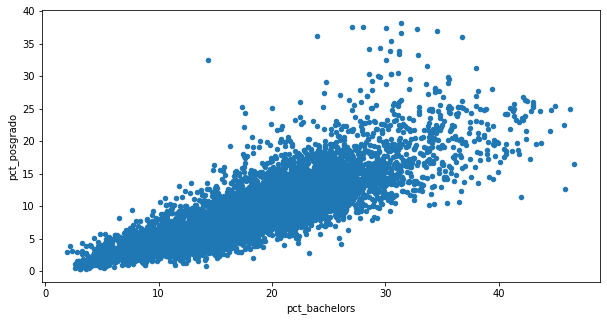

In [454]:
ax = df_pos.plot.scatter(x='pct_bachelors', y='pct_posgrado', figsize=(10,5))
plt.savefig("../reports/figures/02-scatter-bachelor-vs-posgrado.svg")

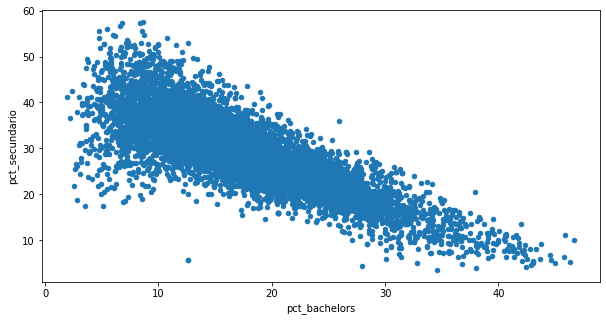

In [455]:
ax = df_pos.plot.scatter(x='pct_bachelors', y='pct_secundario', figsize=(10,5))
plt.savefig("../reports/figures/02-scatter-bachelor-vs-secundario.svg")

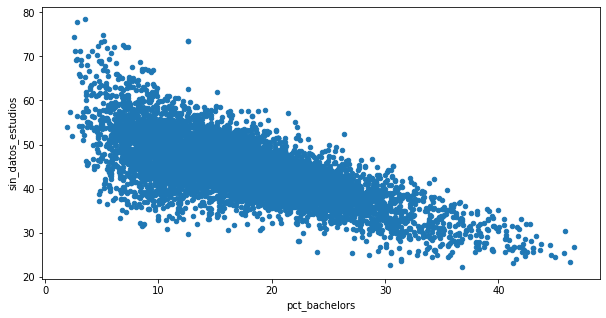

In [456]:
ax = df_pos.plot.scatter(x='pct_bachelors', y='sin_datos_estudios', figsize=(10,5))
plt.savefig("../reports/figures/02-scatter-bachelor-vs-sin_datos.svg")

In [458]:
df_pos.drop([
    # "pct_bachelors", 
    "pct_doctorados", 
    "pct_master"
],axis=1, inplace=True, errors='ignore')

In [459]:
df_pos.columns

Index(['competidores', 'ingreso_mediana', 'ingreso_promedio',
       'densidad_poblacional', 'pct_bachelors', 'pct_secundario',
       'pct_bicicleta', 'pct_omnibus', 'pct_subtes', 'pct_taxi',
       'pct_caminata', 'mediana_valor_hogar', 'SIN VENTAS', 'POCAS', 'MEDIO',
       'MUCHAS', 'pct_0a14', 'pct_15a39', 'pct_40a59', 'pct_60aInf',
       'sin_datos_estudios', 'pct_posgrado'],
      dtype='object')

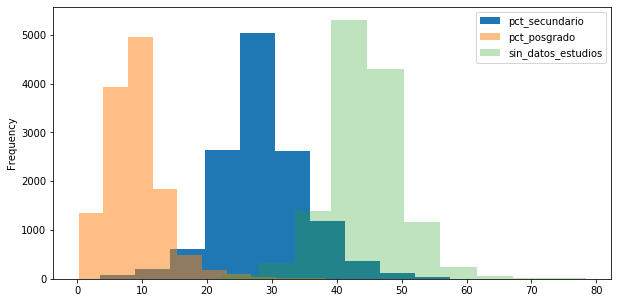

In [465]:
df_pos.pct_secundario.plot.hist(figsize=(10,5))
df_pos.pct_posgrado.plot.hist(alpha=0.5)
df_pos.sin_datos_estudios.plot.hist(alpha=0.3)
plt.legend()
plt.savefig("../reports/figures/02-hist-estudios.svg")

____
Nuevamente, realizamos el mismo analisis para el grupo de columnas de "ingresos"

In [460]:
df_pos[cols_ingresos].describe(include='all')

,ingreso_mediana,ingreso_promedio,mediana_valor_hogar
count,12897.000000,12897.000000,1.289700e+04
mean,55230.557359,72561.925000,2.177605e+05
std,14892.400657,18963.264759,1.210775e+05
min,15519.520000,22629.590000,0.000000e+00
25%,45787.240000,60224.701430,1.441982e+05
50%,54041.010000,70778.705000,1.966274e+05
75%,62078.196250,81275.626550,2.570590e+05
max,165644.920000,201504.010000,1.710129e+06


In [461]:
print_correlated_columns(df_pos, cols_ingresos, True)

,level_0,level_1,0
0,ingreso_mediana,ingreso_promedio,0.978482


In [462]:
print_correlated_columns(df_pos, cols_ingresos, False, True)

,level_0,level_1,0
0,ingreso_promedio,mediana_valor_hogar,0.773522
1,ingreso_mediana,mediana_valor_hogar,0.712455


Podemos observar que la media y la mediana están relacionadas linealmente, asi que podemos descargar una de ellas. Verificamos en un gráfico:  

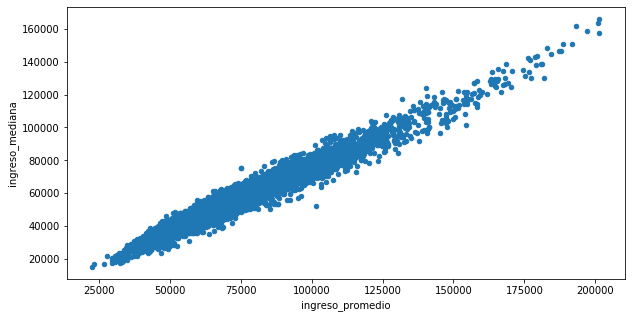

In [466]:
df_pos[cols_ingresos].plot.scatter(x='ingreso_promedio', y='ingreso_mediana', figsize=(10,5))
plt.savefig("../reports/figures/02-scatter-ingreso_promedio-vs-ingreso_mediana.svg")

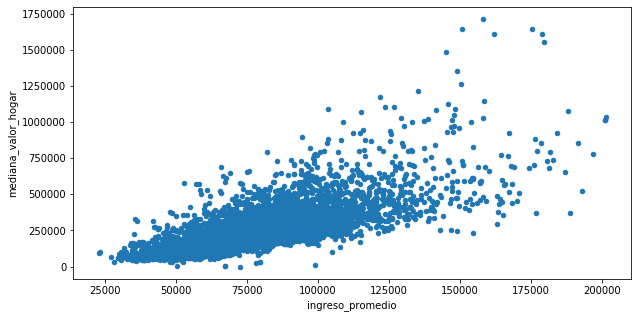

In [467]:
df_pos[cols_ingresos].plot.scatter(x='ingreso_promedio', y='mediana_valor_hogar', figsize=(10,5))
plt.savefig("../reports/figures/02-scatter-ingreso_promedio-vs-mediana_valor_hogar.svg")

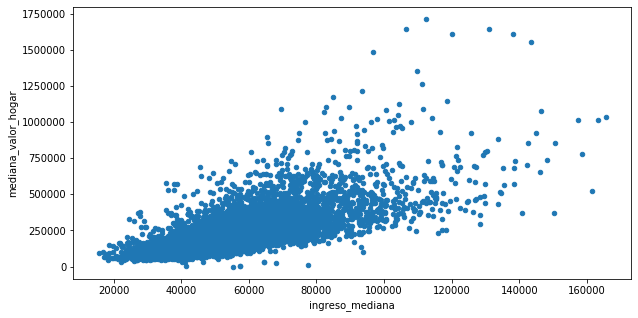

In [468]:
df_pos[cols_ingresos].plot.scatter(x='ingreso_mediana', y='mediana_valor_hogar', figsize=(10,5))
plt.savefig("../reports/figures/02-scatter-ingreso_mediana-vs-mediana_valor_hogar.svg")

Removemos ingresos_promedios de las columnas [¿mejor eliminar una con mayor std/var, o la que es menos lineal?]

In [469]:
df_pos.drop('ingreso_promedio', axis=1, inplace=True)

___
Realizamos el mismo analisis para las columnas del transporte

In [470]:
df_pos[cols_transporte].describe(include='all')

,pct_bicicleta,pct_omnibus,pct_subtes,pct_taxi,pct_caminata
count,12897.000000,12897.000000,12897.000000,12897.000000,12897.000000
mean,0.616114,2.240992,1.437914,0.140254,3.627518
std,0.823949,2.696924,5.174640,0.333907,3.927686
min,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.160000,0.636667,0.000000,0.000000,1.621667
50%,0.416000,1.580000,0.072857,0.046667,2.581429
75%,0.767500,2.850000,0.556000,0.140000,4.160000
max,17.890000,35.970000,72.970000,6.490000,80.960000


In [471]:
df_pos.shape, (df_pos[cols_transporte].sum(axis=1) < 100).shape

((12897, 21), (12897,))

In [472]:
print_correlated_columns(df_pos, cols_transporte)

,pct_bicicleta,pct_omnibus,pct_subtes,pct_taxi,pct_caminata
pct_bicicleta,1.000000,0.289827,0.122577,0.103947,0.383638
pct_omnibus,0.289827,1.000000,0.319274,0.215362,0.332458
pct_subtes,0.122577,0.319274,1.000000,0.510634,0.341301
pct_taxi,0.103947,0.215362,0.510634,1.000000,0.425348
pct_caminata,0.383638,0.332458,0.341301,0.425348,1.000000


Se puede observar que no hay relación lineal entre estas columnas y también que todos los datos no tienen el 100% de las respuestas. Agregamos una columna de "transporte_sin_datos". Seguramente estos datos no serán tenidos en cuenta a la hora de entrenar al modelo dado que la mayoría de los datos están faltantes, eso se puede ver en el siguiente histograma, donde la mayoría de los datos de "transporte_sin_datos" se encuentra entre el 80 y 100% de los datos.

In [473]:
df_pos["transporte_sin_datos"] = 100 - df_pos[cols_transporte].sum(axis=1)

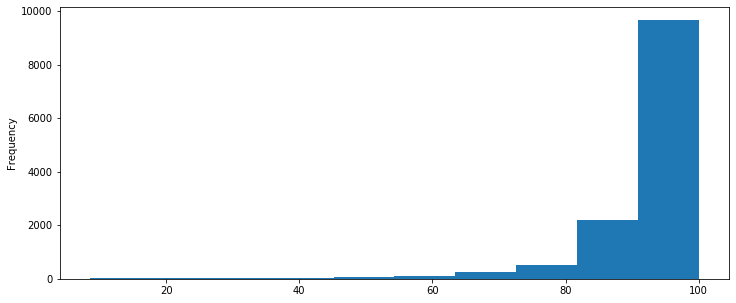

In [477]:
df_pos["transporte_sin_datos"].plot.hist(figsize=(12,5))
plt.savefig("../reports/figures/02-hist-transporte_sin_datos.svg")

___

De las columnas resultantes, solo densidad poblacional está linealmente relacionada con pct_subtes, y está relacionada tambien linealmente leve con varios de los transportes. Como se dijo en el apartado anterior, no se retira la columna porque seguramente a la hora de entrenar el modelo la vamos a retirar.

In [478]:
print_correlated_columns(df_pos, df_pos.columns, True)

,level_0,level_1,0
45,densidad_poblacional,pct_subtes,0.853092
76,pct_bachelors,pct_posgrado,0.840298


In [480]:
print_correlated_columns(df_pos, df_pos.columns, False, True)

,level_0,level_1,0
22,ingreso_mediana,pct_bachelors,0.712820
23,ingreso_mediana,pct_secundario,-0.549854
29,ingreso_mediana,mediana_valor_hogar,0.712455
38,ingreso_mediana,sin_datos_estudios,-0.611029
39,ingreso_mediana,pct_posgrado,0.675399
44,densidad_poblacional,pct_omnibus,0.501230
46,densidad_poblacional,pct_taxi,0.611526
66,pct_bachelors,mediana_valor_hogar,0.668324
75,pct_bachelors,sin_datos_estudios,-0.719628
83,pct_secundario,mediana_valor_hogar,-0.619266


Guardamos el modelo para el entrenamiento.

In [482]:
df_pos.to_parquet('../data/interim/02-pos.parquet')